## λファージのゲノム配列の制限酵素処理
λファージのゲノム配列を取得し、適当な制限酵素で処理した時に得られる配列の長さの分布を出力する。各種の制限酵素で処理した場合の、長さの分布を比較する。


In [2]:
import numpy as np
from Bio import SeqIO
from Bio import Restriction
import seaborn as sns
import matplotlib.pyplot as plt
from DataManager import size_of_fragments_obtained

record = SeqIO.read('data/GCF_000840245.1/GCF_000840245.1_ViralProj14204_genomic.fna', "fasta")
dna_seq = record.seq
seq_length = len(record.seq)
enzymes = ["EcoRI", "HindIII"]

 > The position returned by the method search is the first base of the downstream segment produced by a restriction (i.e. the first base after the position where the enzyme will cut). 

In [3]:
eco_sites = Restriction.EcoRI.search(dna_seq, linear=True)
print(eco_sites)

[21227, 26105, 31748, 39169, 44973]


> Although lambda DNA circularizes for replication and insertion into the E. coli chromosome, the DNA inside the phage particle is linear

In [4]:
eco_lens = size_of_fragments_obtained(eco_sites,seq_length)
print(eco_lens)

[21226, 4878, 5643, 7421, 5804, 3530]


In [5]:
hind_sites = Restriction.HindIII.search(dna_seq)
print(hind_sites)

[23131, 25158, 27480, 36896, 37460, 44142]


In [6]:
hind_lens = size_of_fragments_obtained(hind_sites,seq_length)
print(hind_lens)

[23130, 2027, 2322, 9416, 564, 6682, 4361]


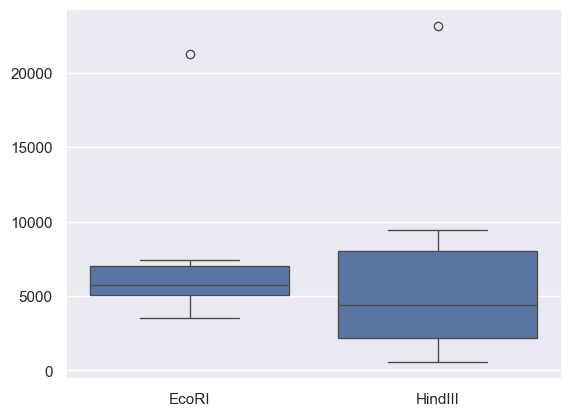

In [7]:
sns.set()
# sns.set_style('whitegrid')
# sns.set_palette('Set3')
sns.boxplot(x=['EcoRI']*len(eco_lens) + ['HindIII']*len(hind_lens), y=np.concatenate([eco_lens, hind_lens]))
plt.show()